In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#10 Train data

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/train10.csv')
X_train = data[['x']]
y_train = data['y']

data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/test1.csv')
X_test= data[['x']]
y_test = data['y']

# Function to perform polynomial regression without regularization (Ordinary Least Squares)
def polynomial_regression(X_train, y_train, degree):
    X_poly = np.c_[np.ones(X_train.shape[0]), X_train]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X_train ** d]

    # Compute weights using Ordinary Least Squares
    weights = np.linalg.lstsq(X_poly, y_train, rcond=None)[0]

    return weights

# Function to predict using polynomial regression from scratch
def predict(X_train, weights, degree):
    X_poly = np.c_[np.ones(X_train.shape[0]), X_train]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X_train ** d]
    return X_poly.dot(weights)

# Define the degree
degrees = np.arange(2, 10) # Change the degree as needed

# Perform polynomial regression without regularization on the random 10 training samples
#weights = polynomial_regression(xtrain, ytrain, degree)

# Predict using the polynomial regression model
#predictions = predict(X_test, weights, degree)

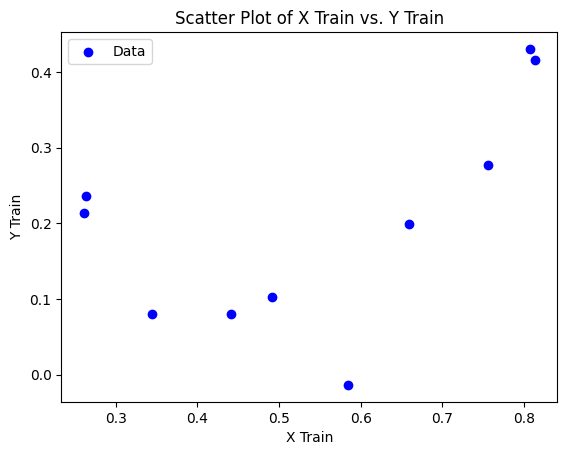

In [6]:
#random_indices
plt.scatter(xtrain, ytrain, label='Data', color='blue', marker='o')
#x_range = np.linspace(xtrain.values.min(), xtrain.values.max(), 50)
#y_pred = predict(x_range, weights, degree)
#plt.plot(x_range, y_pred, color='blue', label=f'Degree {degree}')

# Add labels and a title
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title('Scatter Plot of X Train vs. Y Train')

# Add a legend (if applicable)
plt.legend()

# Show the plot
plt.show()


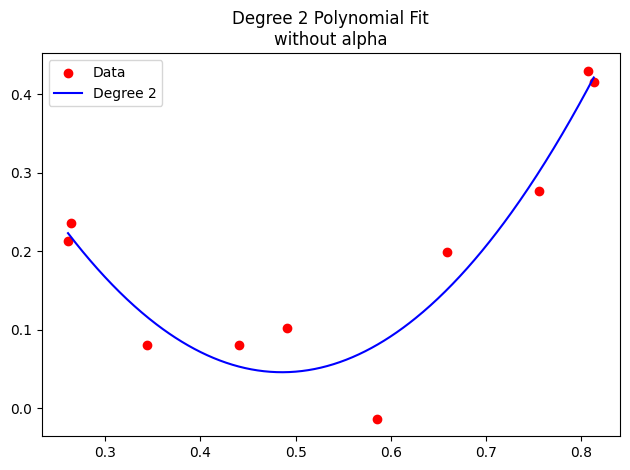

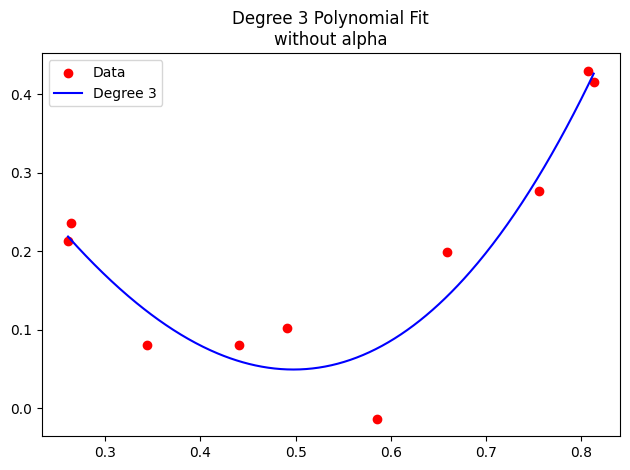

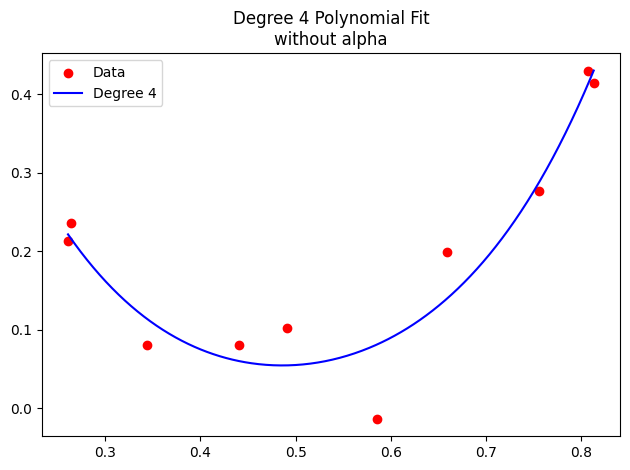

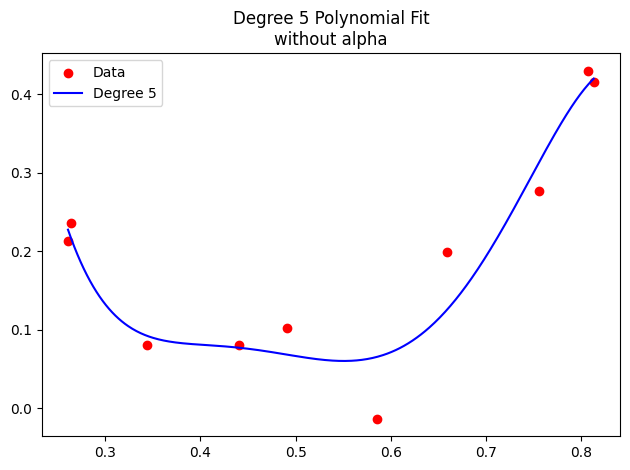

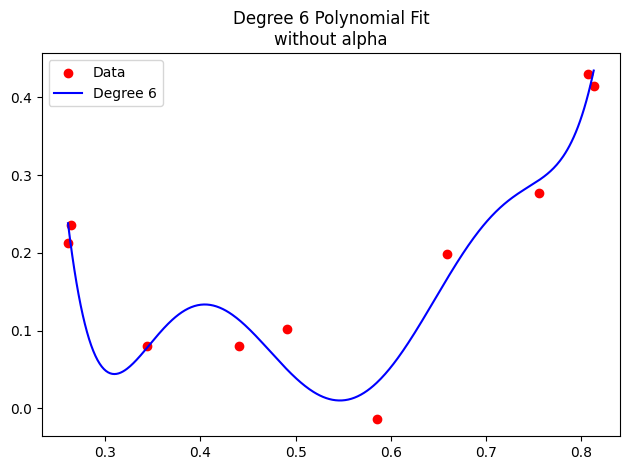

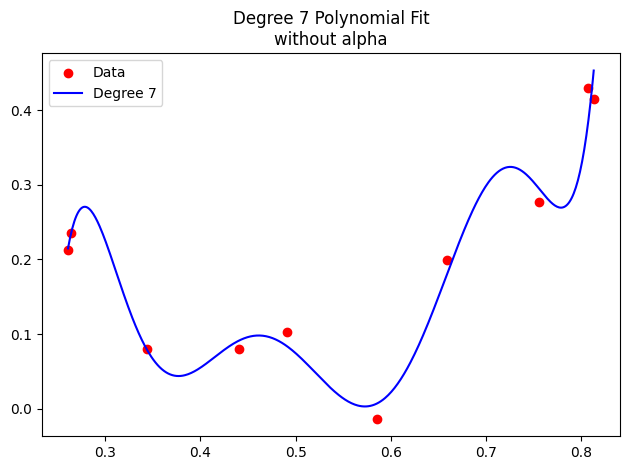

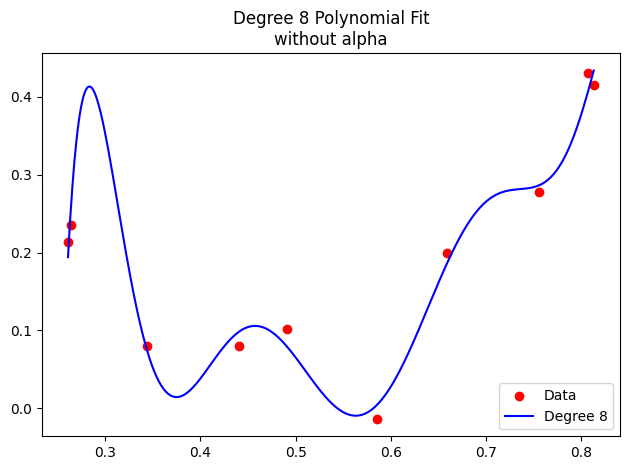

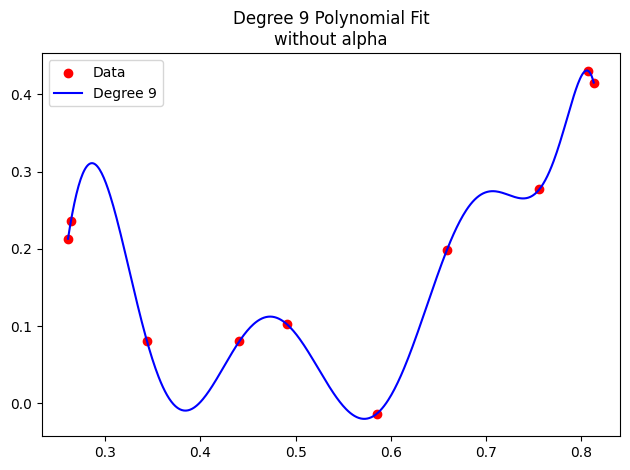

In [9]:
#fig, axs = plt.subplots(len(degrees), figsize=(10,10), sharex=True, sharey=True)
#fig, axs = plt.plot(len(degrees), figsize=(10,15))
#fig, axs = plt.subplots(len(degrees), 1, figsize=(8, 6), sharex=True)

for i, degree in enumerate(degrees):
    #for j, alpha in enumerate(alphas):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(xtrain.values, ytrain.values, degree)

    # Plot the data points
    plt.scatter(xtrain.values, ytrain.values, color='red', label='Data')

    # Plot the approximated function
    x_range = np.linspace(xtrain.values.min(), xtrain.values.max(), 500)
    y_pred = predict(x_range, weights, degree)
    plt.plot(x_range, y_pred, color='blue', label=f'Degree {degree}')
    plt.title(f'Degree {degree} Polynomial Fit\nwithout alpha')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
weights.size

10

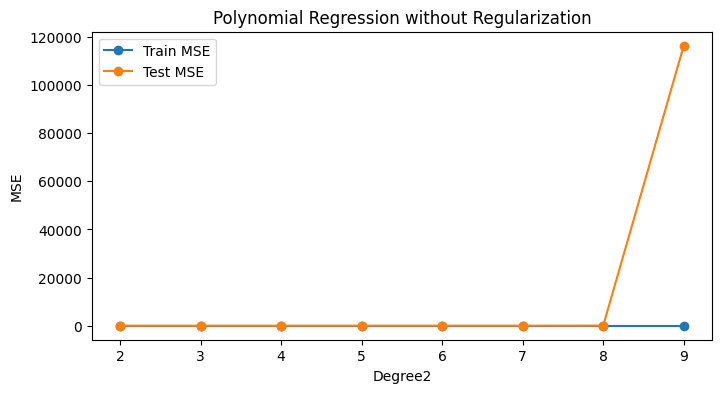

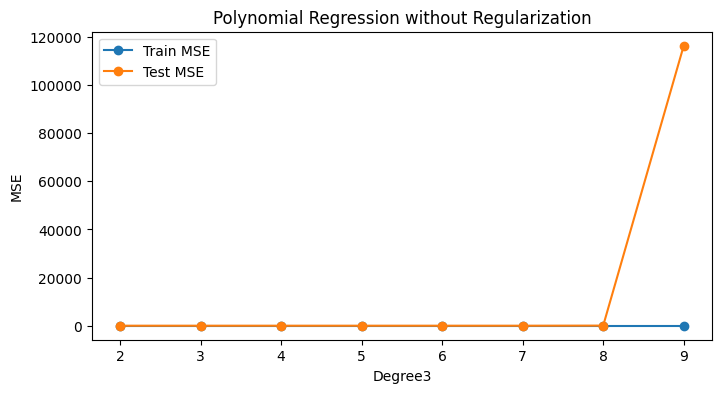

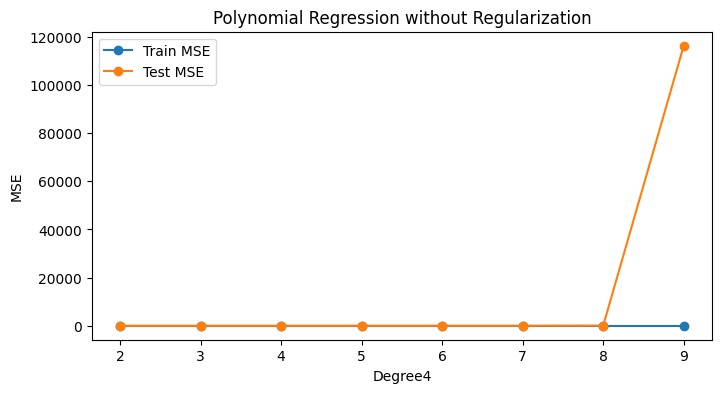

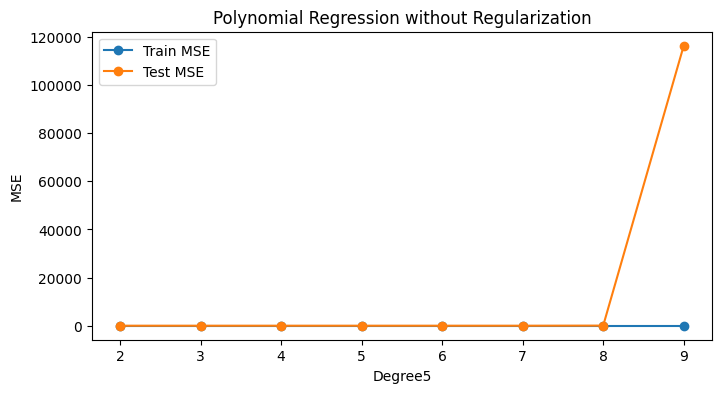

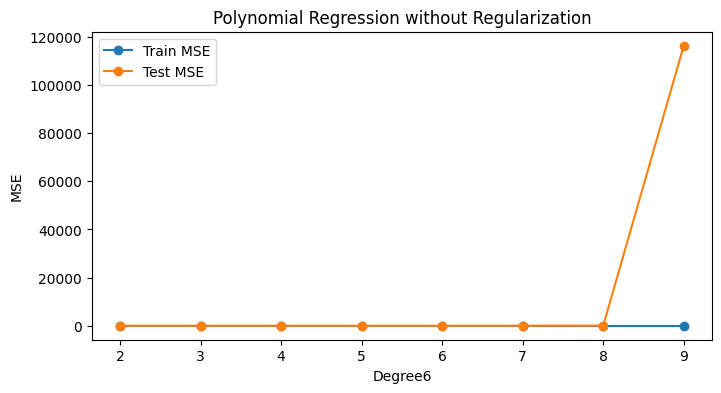

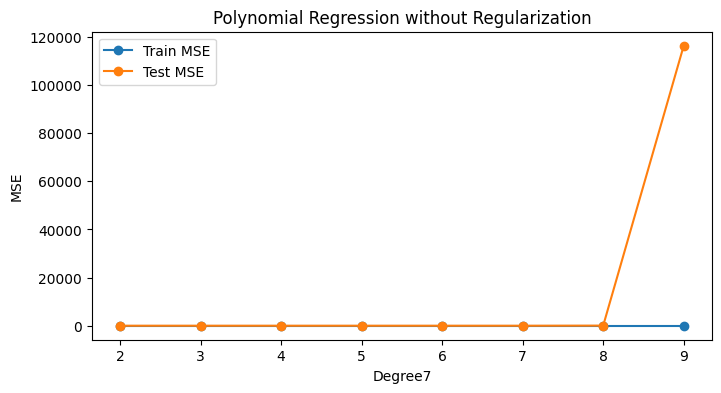

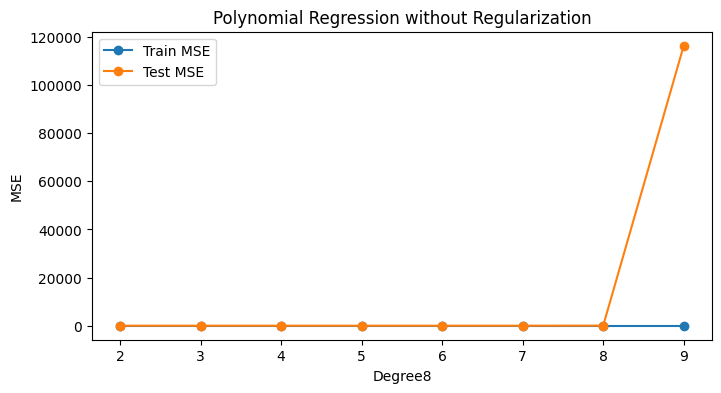

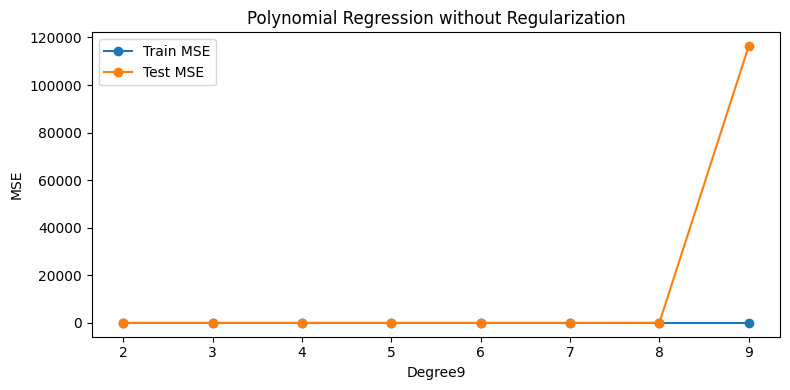

In [ ]:
# Initialize arrays to store MSE values
train_mses = np.zeros(len(degrees))
test_mses = np.zeros(len(degrees))

# Split data into training and test sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Use random_state for reproducibility

# Choose 10 random training samples
random_indices = np.random.choice(X_train.index, size=10, replace=False)
xtrain = X_train.loc[random_indices]
ytrain = y_train.loc[random_indices]'''
# Function to perform polynomial regression without regularization
def polynomial_regression(X, y, degree):
    X_poly = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ordinary Least Squares (no regularization)
    weights = np.linalg.lstsq(X_poly, y, rcond=None)[0]

    return weights

# Function to predict using polynomial regression
def predict(X, weights):
    X_poly = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_poly = np.c_[X_poly, X ** d]  # Add polynomial features up to the specified degree
    return X_poly.dot(weights)

# Iterate over degrees and calculate MSE for each degree
for i, degree in enumerate(degrees):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(xtrain.values, ytrain.values, degree)

    # Predict on training and test data
    ytrain_pred = predict(xtrain.values, weights)
    y_test_pred = predict(X_test.values, weights)

    # Calculate MSE for training and test data
    train_mse = np.mean((ytrain - ytrain_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Store MSE values
    train_mses[i] = train_mse
    test_mses[i] = test_mse

#plt.figure(figsize=(8, 4))

for i, degree in enumerate(degrees):
    axs[i].plot(train_mses[i], label='Train MSE', marker='o')
    axs[i].plot(test_mses[i], label='Test MSE', marker='o')
    axs[i].set_title(f'Degree {degree}')
    axs[i].set_ylabel('MSE')
    axs[i].legend()

    # Plot MSE values
    plt.figure(figsize=(8, 4))
    plt.plot(degrees, train_mses, label='Train MSE', marker='o')
    plt.plot(degrees, test_mses, label='Test MSE', marker='o')
    #plt.plot(train_mses, marker='o', label=f'Training, Degree={degree}')
    #plt.plot(test_mses, marker='o', label=f'Test, Degree={degree}')

    plt.title('Polynomial Regression without Regularization')
    plt.xlabel(f'Degree{degree}')
    plt.ylabel('MSE')
    #plt.xlabel('Degree')
    plt.legend()
plt.tight_layout()
plt.show()

MSE

#50 training

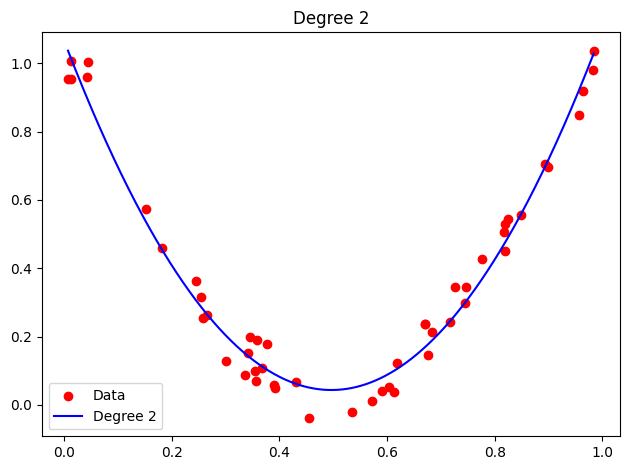

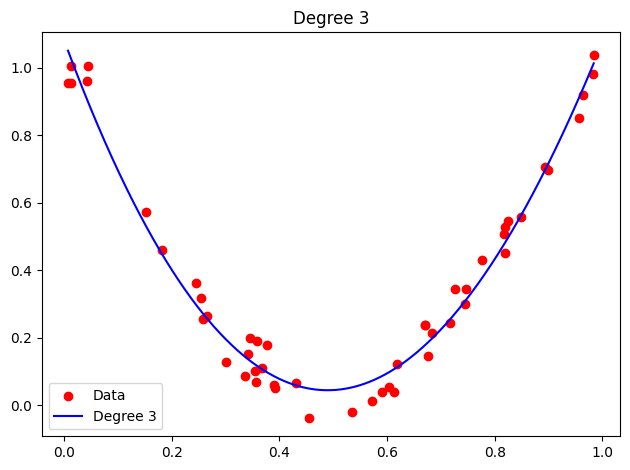

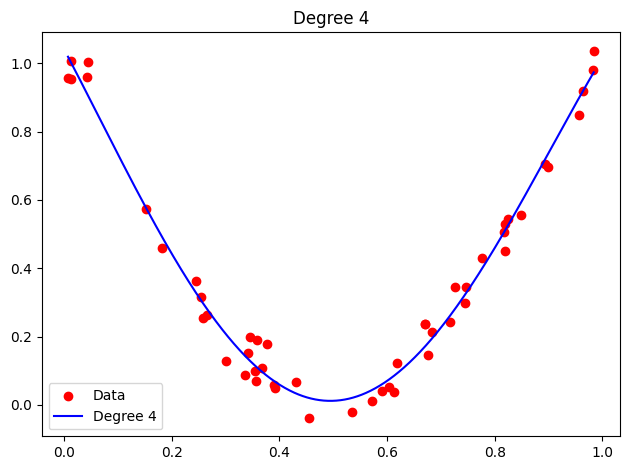

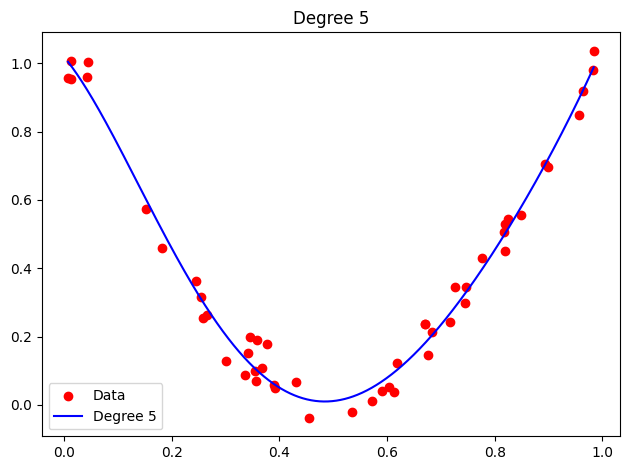

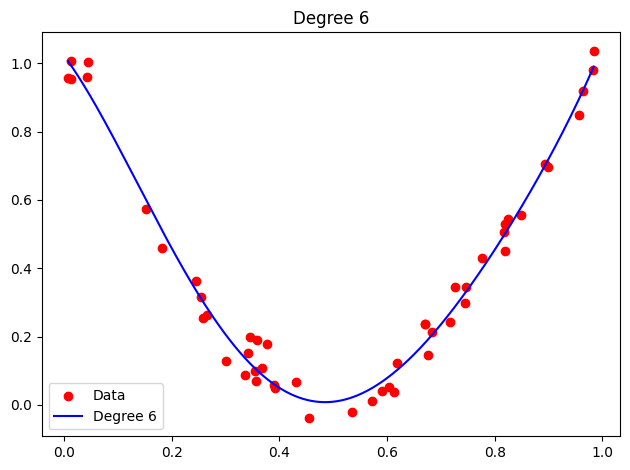

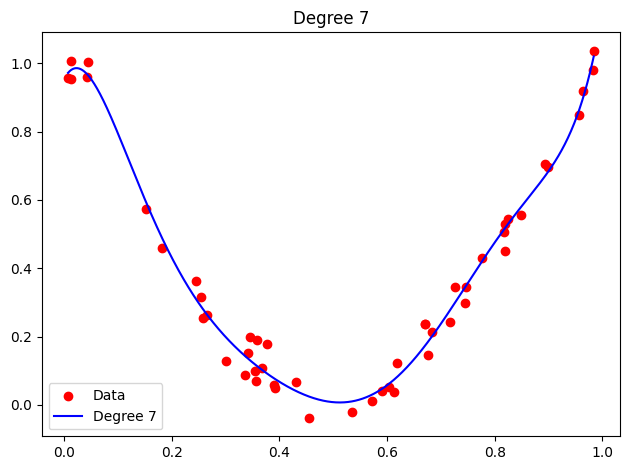

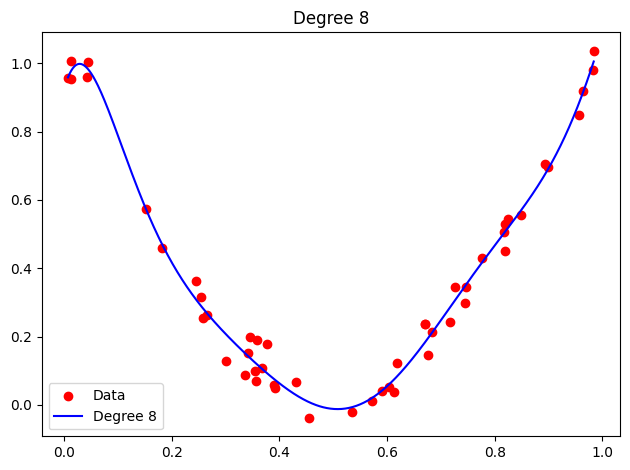

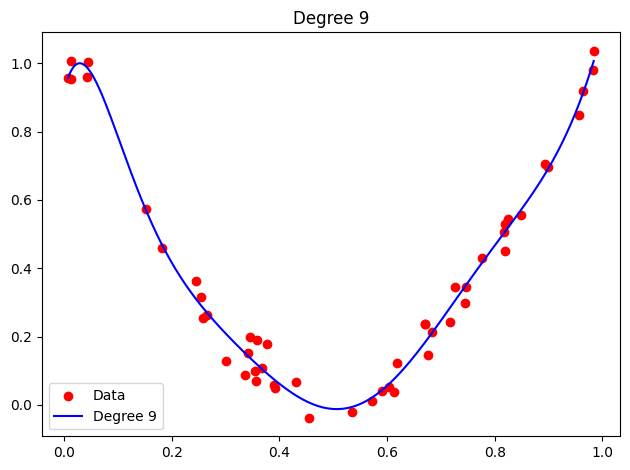

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data from CSV for training and testing
train_data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/train50.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/test1.csv')

xtrain = train_data[['x']]
ytrain = train_data['y']

X_test = test_data[['x']]
y_test = test_data['y']

# Function to perform polynomial regression with regularization (Ridge) from scratch
def polynomial_regression(xtrain, ytrain, degree):
    X_poly = np.c_[np.ones(xtrain.shape[0]), xtrain]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, xtrain ** d]

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(ytrain)

    return weights

# Function to predict using polynomial regression from scratch
def predict(xtrain, weights, degree):
    X_poly = np.c_[np.ones(xtrain.shape[0]), xtrain]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, xtrain ** d]
    return X_poly.dot(weights)

# Define the degrees of the polynomial
degrees = np.arange(2, 10)

# Define the values of alpha (regularization parameter)
#alphas = [1e-10, 1e-18, 1e-20, 1e-30]

# Create subplots for different degrees of polynomials
#fig, axs = plt.subplots(len(degrees), figsize=(15, 15), sharex=True, sharey=True)

for i, degree in enumerate(degrees):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(xtrain.values, ytrain.values, degree)

    # Plot the data points
    plt.scatter(xtrain, ytrain, color='red', label='Data')

    # Plot the approximated function
    x_range = np.linspace(xtrain.min().values, xtrain.max().values, 1000)
    y_pred = predict(x_range, weights, degree)
    plt.plot(x_range, y_pred, color='blue', label=f'Degree {degree}')
    plt.title(f'Degree {degree}')
    plt.legend()

    plt.tight_layout()
    plt.show()


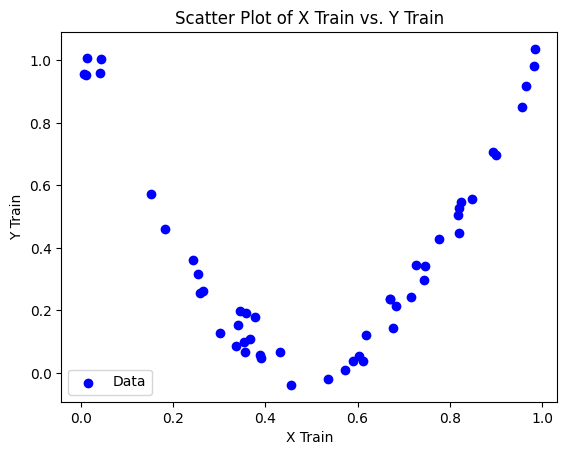

In [9]:
#random_indices
plt.scatter(xtrain, ytrain, label='Data', color='blue', marker='o')

# Add labels and a title
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title('Scatter Plot of X Train vs. Y Train')

# Add a legend (if applicable)
plt.legend()

# Show the plot
plt.show()

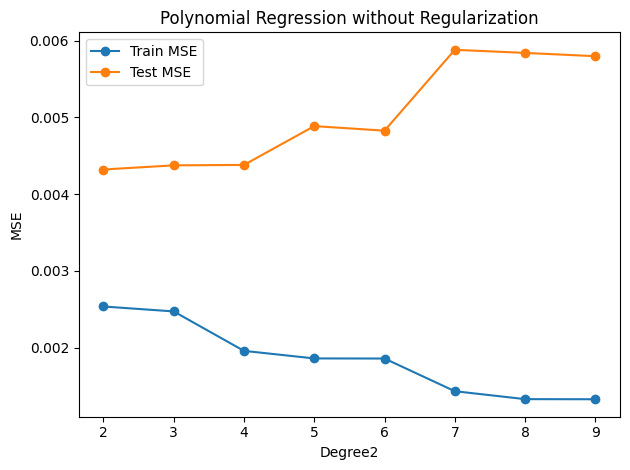

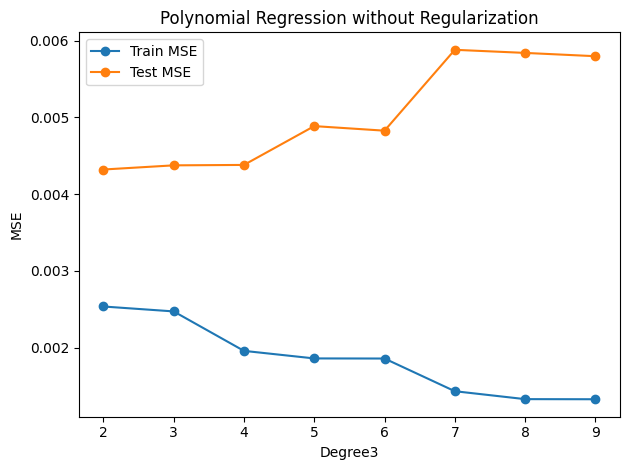

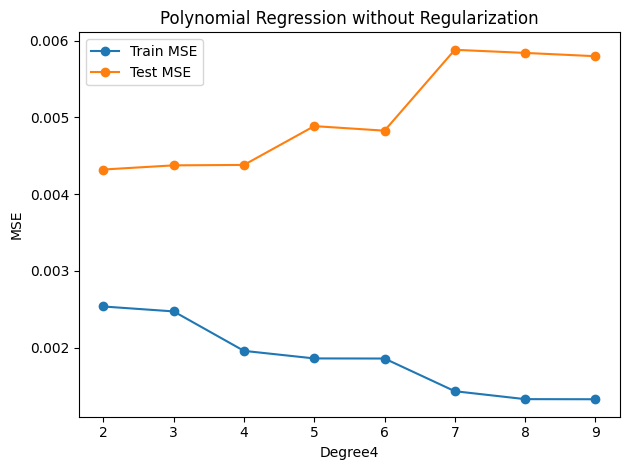

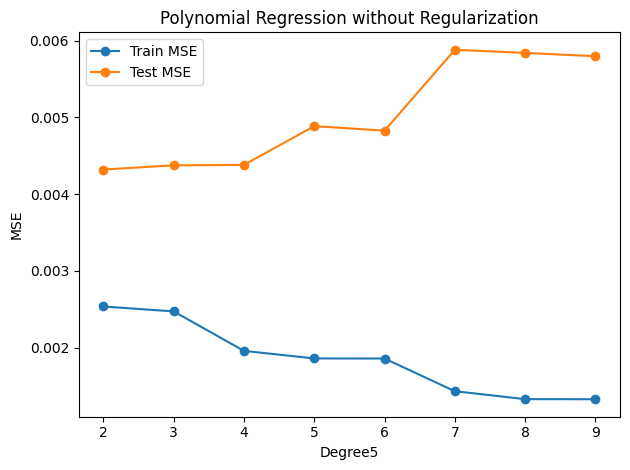

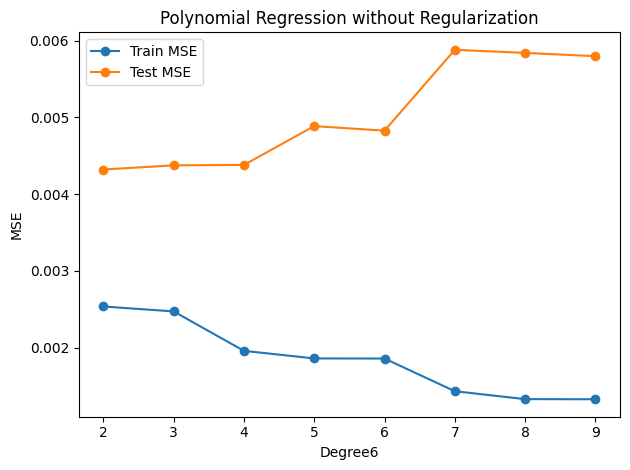

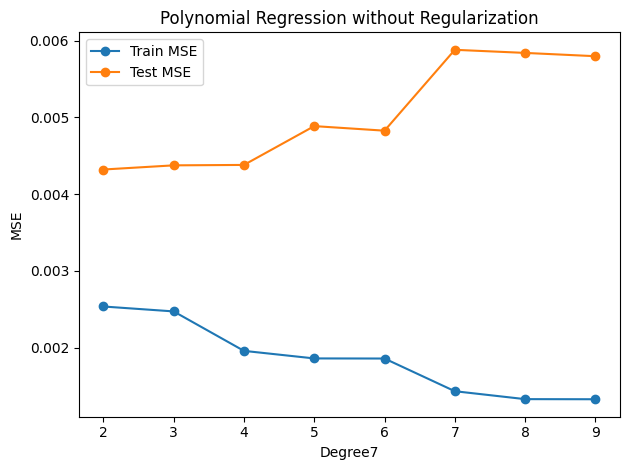

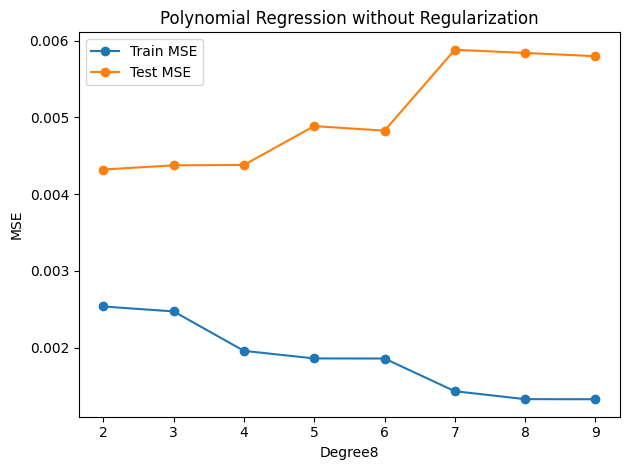

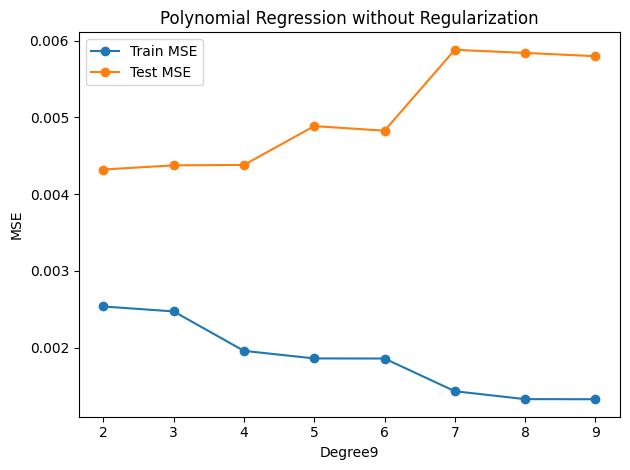

In [12]:
# Initialize arrays to store MSE values
train_mses = np.zeros(len(degrees))
test_mses = np.zeros(len(degrees))

# Split data into training and test sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Use random_state for reproducibility

# Choose 10 random training samples
random_indices = np.random.choice(X_train.index, size=10, replace=False)
xtrain = X_train.loc[random_indices]
ytrain = y_train.loc[random_indices]'''
# Function to perform polynomial regression without regularization
def polynomial_regression(xtrain, ytrain, degree):
    X_poly = np.c_[np.ones(xtrain.shape[0]), xtrain]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, xtrain ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ordinary Least Squares (no regularization)
    weights = np.linalg.lstsq(X_poly, ytrain, rcond=None)[0]

    return weights

# Function to predict using polynomial regression
def predict(xtrain, weights):
    X_poly = np.c_[np.ones(xtrain.shape[0]), xtrain]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_poly = np.c_[X_poly, xtrain ** d]  # Add polynomial features up to the specified degree
    return X_poly.dot(weights)

# Iterate over degrees and calculate MSE for each degree
for i, degree in enumerate(degrees):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(xtrain.values, ytrain.values, degree)

    # Predict on training and test data
    ytrain_pred = predict(xtrain.values, weights)
    y_test_pred = predict(X_test.values, weights)

    # Calculate MSE for training and test data
    train_mse = np.mean((ytrain - ytrain_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Store MSE values
    train_mses[i] = train_mse
    test_mses[i] = test_mse

#plt.figure(figsize=(8, 6))

for i, degree in enumerate(degrees):
    #axs[i].plot(train_mses[i], label='Train MSE', marker='o')
    #axs[i].plot(test_mses[i], label='Test MSE', marker='o')
    #axs[i].set_title(f'Degree {degree}')
    #axs[i].set_ylabel('MSE')
    #axs[i].legend()

    # Plot MSE values
    #plt.figure(figsize=(8, 6))
    plt.plot(degrees, train_mses, label='Train MSE', marker='o')
    plt.plot(degrees, test_mses, label='Test MSE', marker='o')
    #plt.plot(train_mses, marker='o', label=f'Training, Degree={degree}')
    #plt.plot(test_mses, marker='o', label=f'Test, Degree={degree}')

    plt.title('Polynomial Regression without Regularization')
    plt.xlabel(f'Degree{degree}')
    plt.ylabel('MSE')
    #plt.xlabel('Degree')
    plt.legend()
    plt.tight_layout()
    plt.show()

#100 Train Data

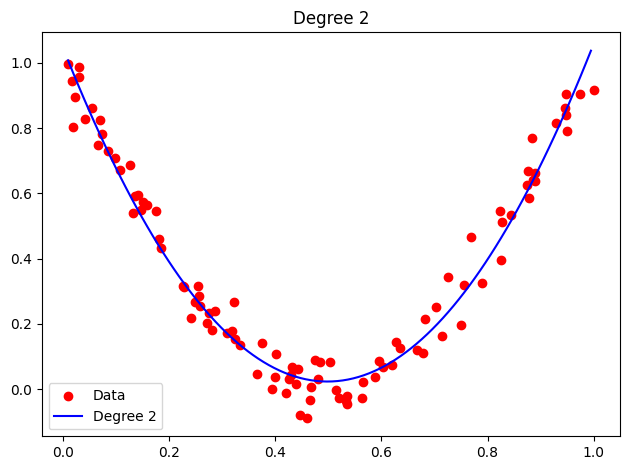

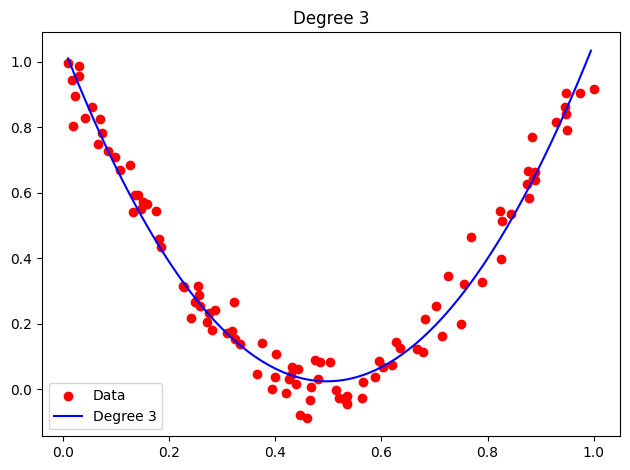

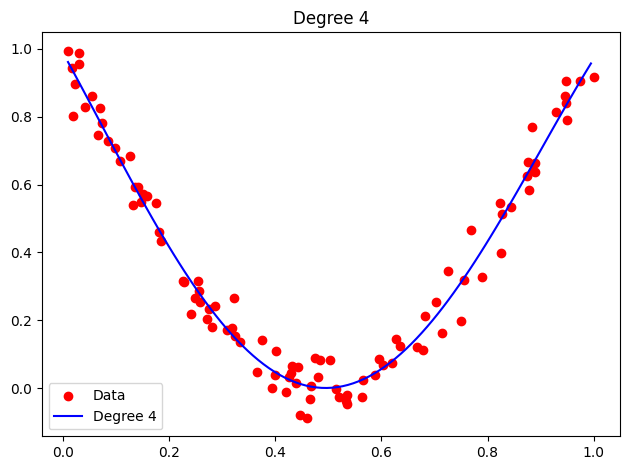

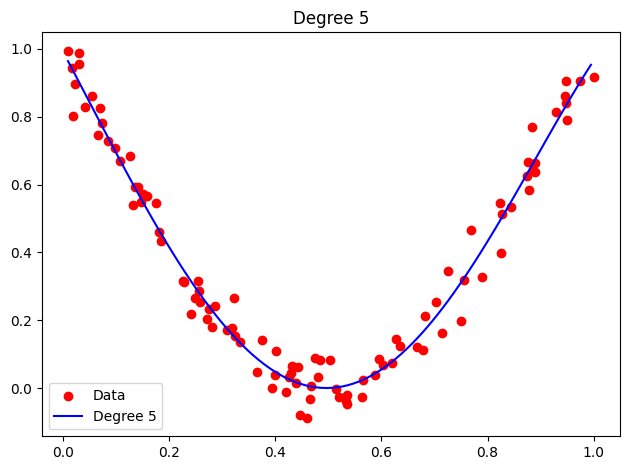

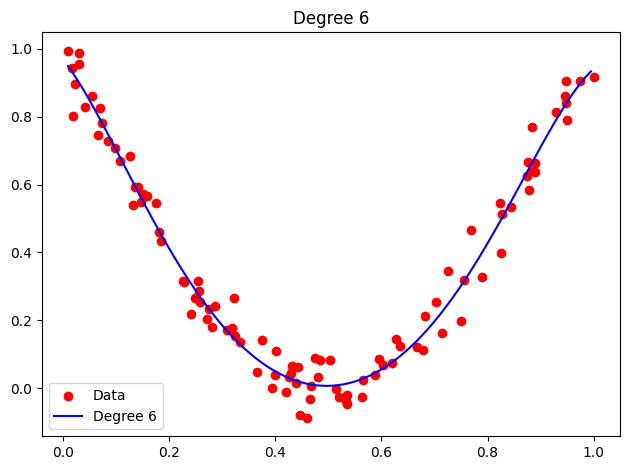

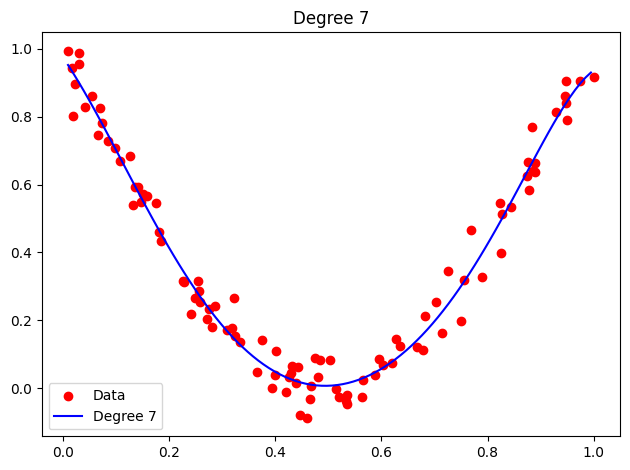

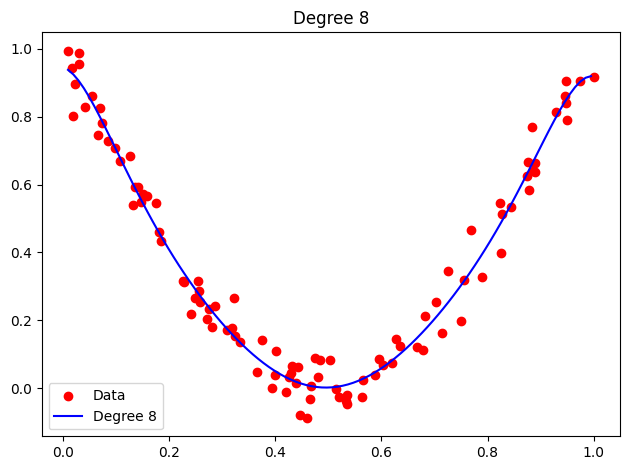

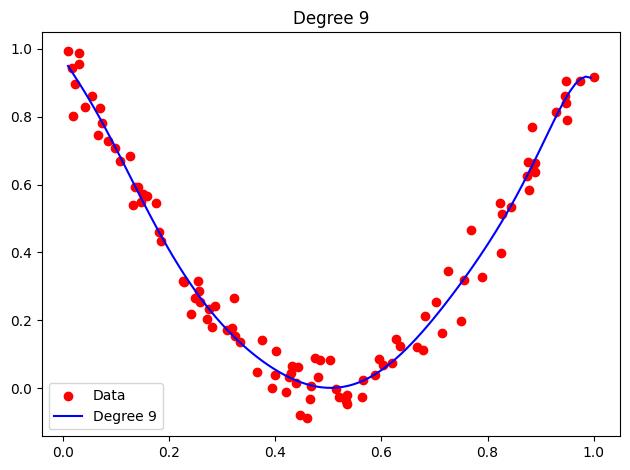

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data from CSV
train_data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/train100_1.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/test1.csv')

xtrain = train_data[['x']]
#print(xtrain)
ytrain = train_data['y']
#print(ytrain)

X_test = test_data[['x']]
y_test = test_data['y']

# Function to perform polynomial regression with regularization (Ridge) from scratch
def polynomial_regression(xtrain, ytrain, degree):
    X_poly = np.c_[np.ones(xtrain.shape[0]), xtrain]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, xtrain ** d]

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(ytrain)

    return weights

# Function to predict using polynomial regression from scratch
def predict(xtrain, weights, degree):
    X_poly = np.c_[np.ones(xtrain.shape[0]), xtrain]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, xtrain ** d]
    return X_poly.dot(weights)

# Define the degrees of the polynomial
degrees = np.arange(2, 10)

# Define the values of alpha (regularization parameter)
#alphas = [1e-10, 1e-18, 1e-20, 1e-30]

# Create subplots for different degrees of polynomials
#fig, axs = plt.subplots(len(degrees), figsize=(15, 15), sharex=True, sharey=True)

for i, degree in enumerate(degrees):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(xtrain.values, ytrain.values, degree)

    # Plot the data points
    plt.scatter(xtrain, ytrain, color='red', label='Data')

    # Plot the approximated function
    x_range = np.linspace(xtrain.min(), ytrain.max(), 100)
    y_pred = predict(x_range, weights, degree)
    plt.plot(x_range, y_pred, color='blue', label=f'Degree {degree}')
    plt.title(f'Degree {degree}')
    plt.legend()

    plt.tight_layout()
    plt.show()


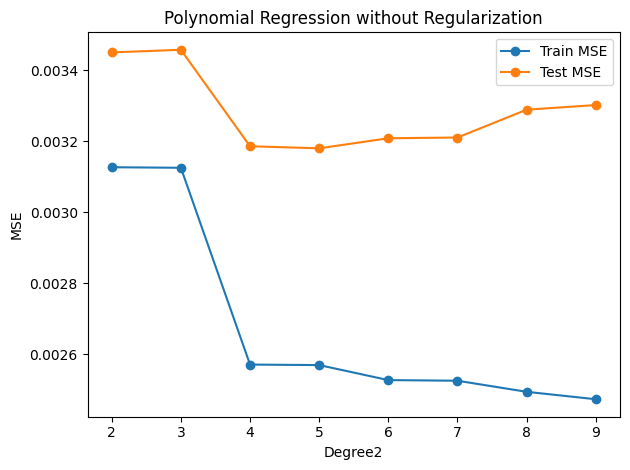

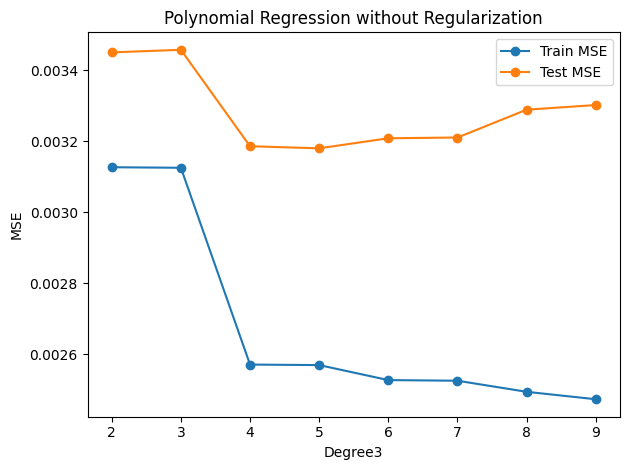

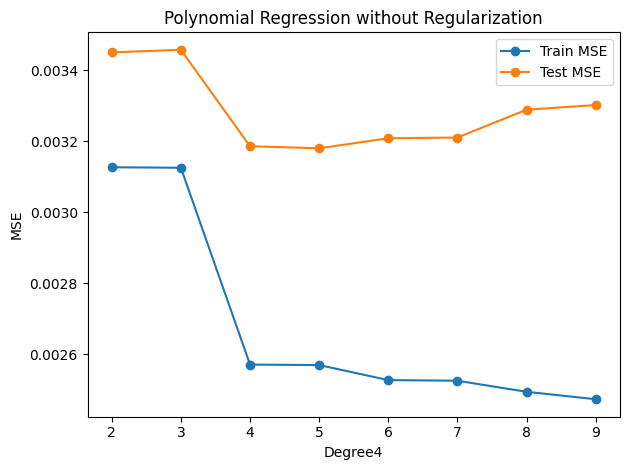

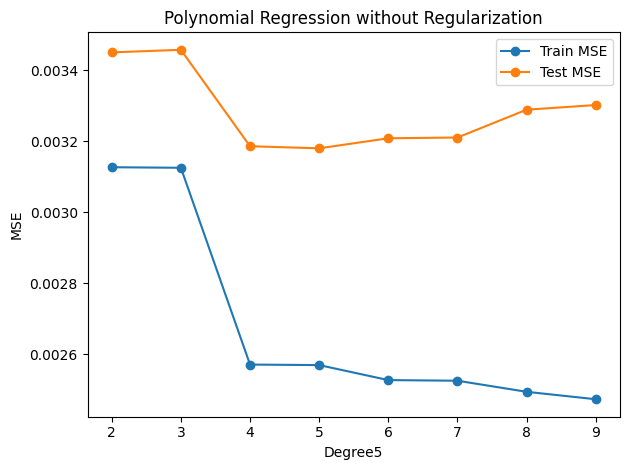

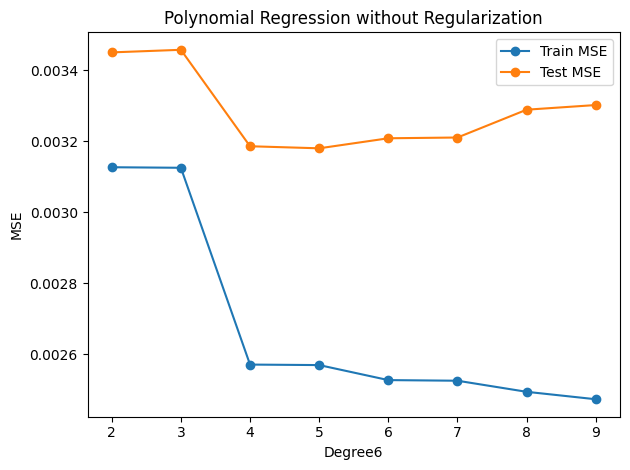

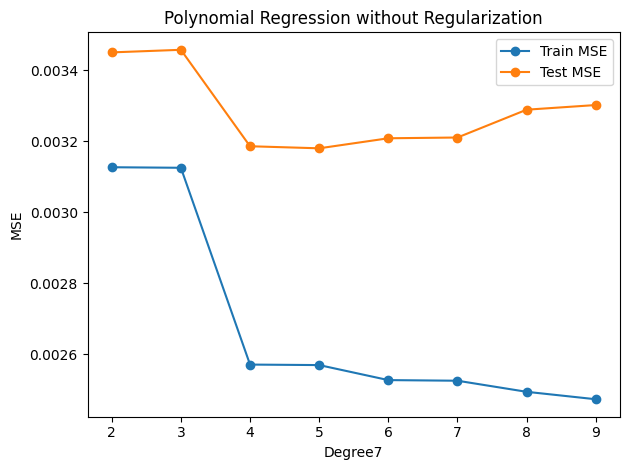

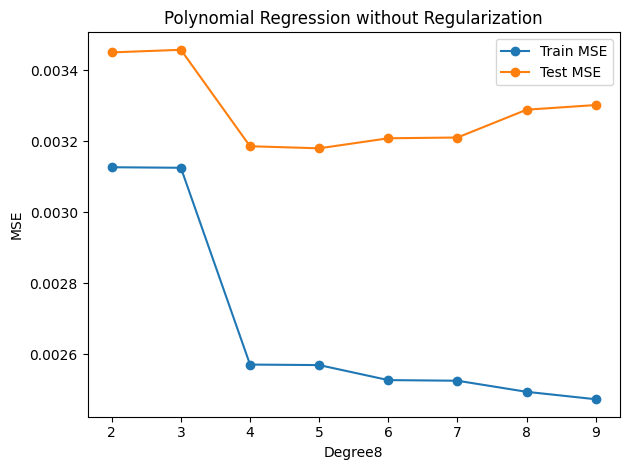

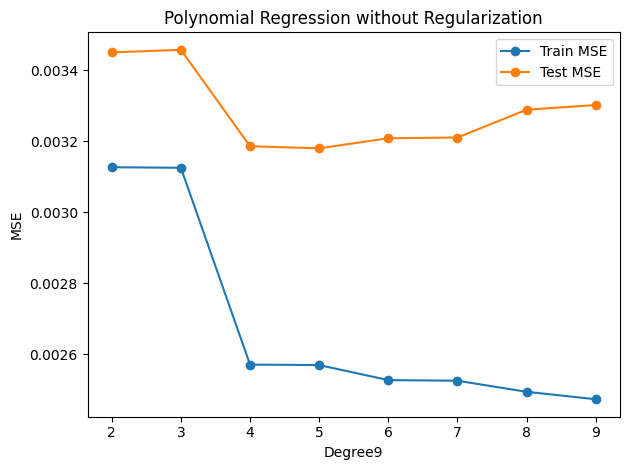

In [21]:
# Initialize arrays to store MSE values
train_mses = np.zeros(len(degrees))
test_mses = np.zeros(len(degrees))

# Split data into training and test sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Use random_state for reproducibility

# Choose 10 random training samples
random_indices = np.random.choice(X_train.index, size=10, replace=False)
xtrain = X_train.loc[random_indices]
ytrain = y_train.loc[random_indices]'''
# Function to perform polynomial regression without regularization
def polynomial_regression(xtrain, ytrain, degree):
    X_poly = np.c_[np.ones(xtrain.shape[0]), xtrain]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, xtrain ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ordinary Least Squares (no regularization)
    weights = np.linalg.lstsq(X_poly, ytrain, rcond=None)[0]

    return weights

# Function to predict using polynomial regression
def predict(xtrain, weights):
    X_poly = np.c_[np.ones(xtrain.shape[0]), xtrain]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_poly = np.c_[X_poly, xtrain ** d]  # Add polynomial features up to the specified degree
    return X_poly.dot(weights)

# Iterate over degrees and calculate MSE for each degree
for i, degree in enumerate(degrees):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(xtrain.values, ytrain.values, degree)

    # Predict on training and test data
    ytrain_pred = predict(xtrain.values, weights)
    y_test_pred = predict(X_test.values, weights)

    # Calculate MSE for training and test data
    train_mse = np.mean((ytrain - ytrain_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Store MSE values
    train_mses[i] = train_mse
    test_mses[i] = test_mse

#plt.figure(figsize=(8, 6))

for i, degree in enumerate(degrees):
    #axs[i].plot(train_mses[i], label='Train MSE', marker='o')
    #axs[i].plot(test_mses[i], label='Test MSE', marker='o')
    #axs[i].set_title(f'Degree {degree}')
    #axs[i].set_ylabel('MSE')
    #axs[i].legend()

    # Plot MSE values
    #plt.figure(figsize=(8, 6))
    plt.plot(degrees, train_mses, label='Train MSE', marker='o')
    plt.plot(degrees, test_mses, label='Test MSE', marker='o')
    #plt.plot(train_mses, marker='o', label=f'Training, Degree={degree}')
    #plt.plot(test_mses, marker='o', label=f'Test, Degree={degree}')

    plt.title('Polynomial Regression without Regularization')
    plt.xlabel(f'Degree{degree}')
    plt.ylabel('MSE')
    #plt.xlabel('Degree')
    plt.legend()
    plt.tight_layout()
    plt.show()

#Complete Data

In [ ]:
# Load data from CSV
data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/1.csv')
X = data[['x']]
y = data['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to perform polynomial regression with regularization (Ridge) from scratch
def polynomial_regression(X, y, degree):
    X_poly = np.c_[np.ones(X.shape[0]), X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    return weights

# Function to predict using polynomial regression from scratch
def predict(X, weights, degree):
    X_poly = np.c_[np.ones(X.shape[0]), X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]
    return X_poly.dot(weights)

# Define the degrees of the polynomial
degrees = np.arange(2, 10)

# Define the values of alpha (regularization parameter)
#alphas = [1e-10, 1e-18, 1e-20, 1e-30]

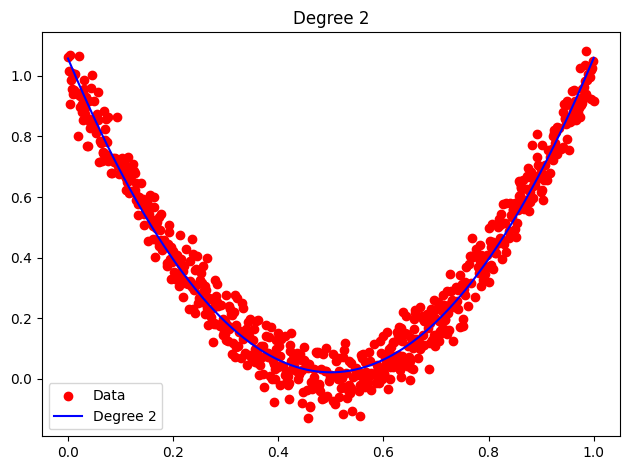

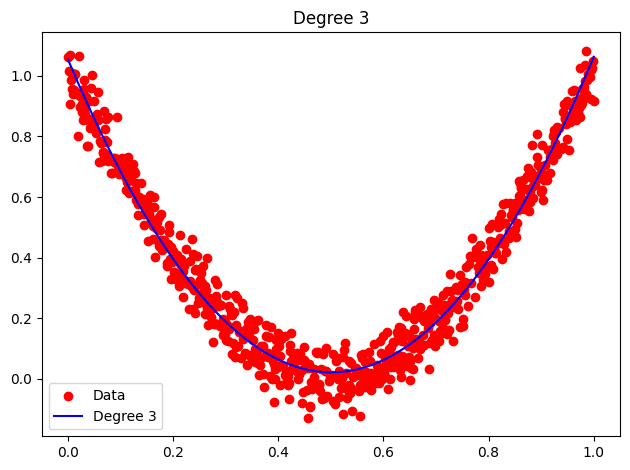

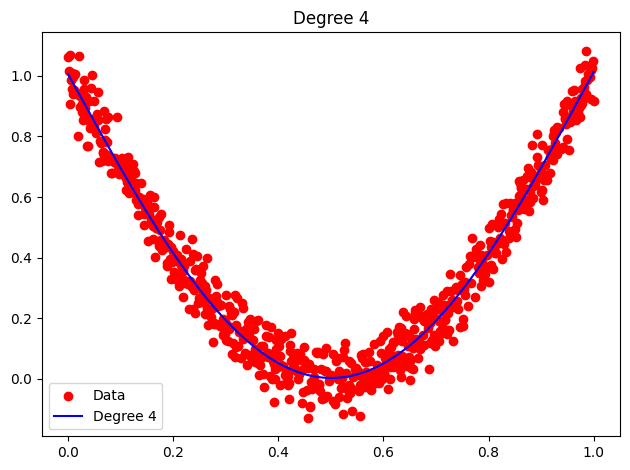

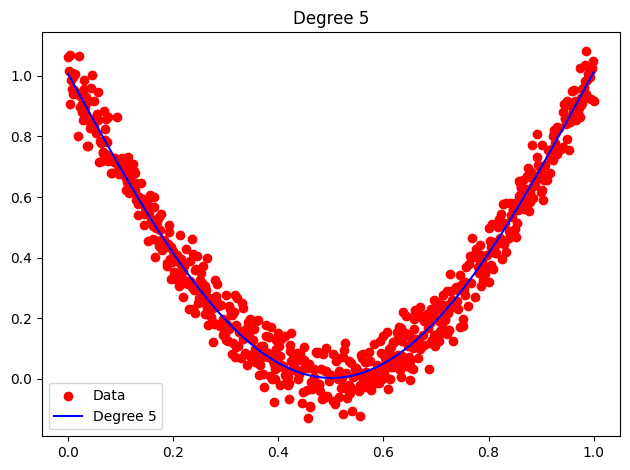

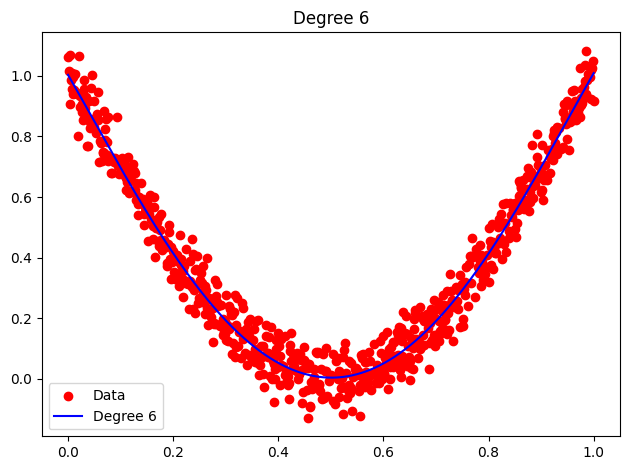

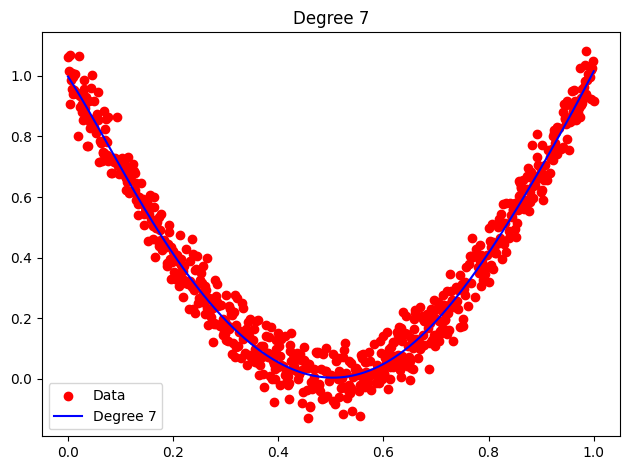

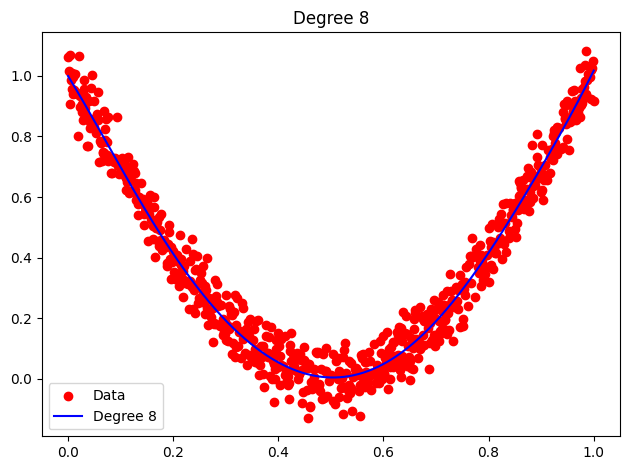

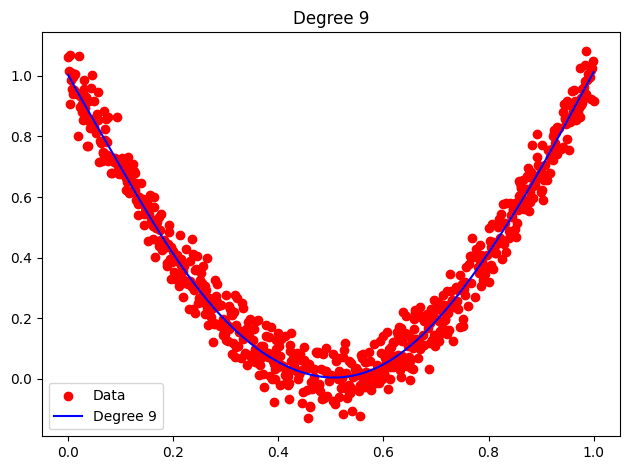

In [ ]:
# Create subplots for different degrees of polynomials
#fig, axs = plt.subplots(len(degrees), figsize=(15, 15), sharex=True, sharey=True)

for i, degree in enumerate(degrees):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(X_train.values, y_train.values, degree)

    # Plot the data points
    plt.scatter(X_train, y_train, color='red', label='Data')

    # Plot the approximated function
    x_range = np.linspace(X.min().values, X.max().values, 1000)
    y_pred = predict(x_range, weights, degree)
    plt.plot(x_range, y_pred, color='blue', label=f'Degree {degree}')
    plt.title(f'Degree {degree}')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
best_degree = None
best_alpha = None
best_mse = float('inf')  # Initialize with a high value

for i, degree in enumerate(degrees):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(X_train.values, y_train.values, degree)

    # Calculate mean squared error or any other evaluation metric
    y_pred = predict(X_test.values, weights, degree)
    mse = np.mean((y_test - y_pred) ** 2)

    # Check if this model has the lowest MSE
    if mse < best_mse:
        best_mse = mse
        best_degree = degree

        # Get the weights before regularization
        X_poly = np.c_[np.ones(X_train.shape[0]), X_train]
        for d in range(2, best_degree + 1):
            X_poly = np.c_[X_poly, X_train.values ** d]
        weights_before_reg = np.linalg.lstsq(X_poly, y_train, rcond=None)[0]

        # Set alpha to 0 to turn off regularization and get weights after regularization
        X_poly_reg = np.c_[np.ones(X_train.shape[0]), X_train]
        for d in range(2, best_degree + 1):
            X_poly_reg = np.c_[X_poly_reg, X_train.values ** d]
        weights_after_reg = np.linalg.lstsq(X_poly_reg.T.dot(X_poly_reg),
                                                 X_poly_reg.T.dot(y_train), rcond=None)[0]
        #print(f'Degree: {degree}, Alpha: {alpha}')
        print(f'Weights before regularization: {weights_before_reg}')
        #print(f'Weights after regularization: {weights_after_reg}')
        print('=' * 30)



Weights before regularization: [ 1.0566879  -4.14137355  4.14338399]
Weights before regularization: [ 1.05312825 -4.09893888  4.03725874  0.07084254]
Weights before regularization: [ 1.00536724 -3.13036492 -0.34703322  6.91225083 -3.42758192]
Weights before regularization: [ 1.00615091 -3.15428438 -0.17977939  6.46719976 -2.92776939 -0.19967174]
Weights before regularization: [  0.99905095  -2.82541141  -3.55813492  18.4902874  -12.05802975
 -38.87411846  98.12136675 -86.1135586   26.83540577]


#Best Degree, Alpha, MSE

In [ ]:
# Print the best degree, alpha, and corresponding weights before and after regularization
print(f'Best Degree: {best_degree}')
#print(f'Best Alpha: {best_alpha}')
print(f'Weights before regularization: {weights_before_reg}')
#print(f'Weights after regularization: {weights_after_reg}')
print(f'Best Mean Squared Error: {best_mse}')

Best Degree: 8
Weights before regularization: [  0.99905095  -2.82541141  -3.55813492  18.4902874  -12.05802975
 -38.87411846  98.12136675 -86.1135586   26.83540577]
Best Mean Squared Error: 0.0031058971700144043


#MSE

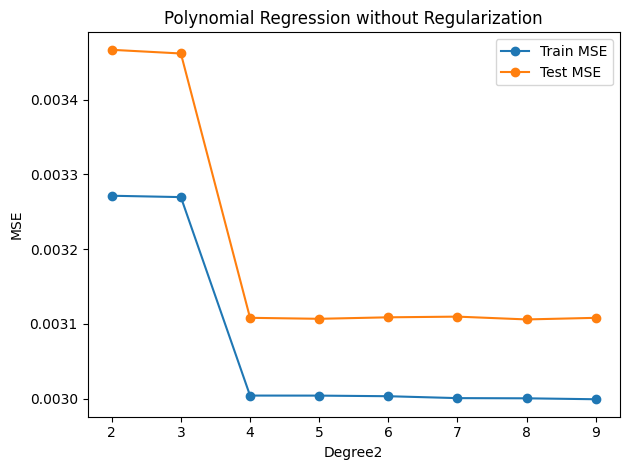

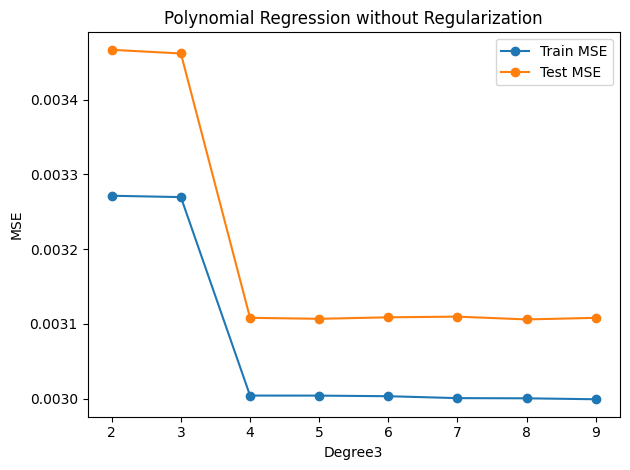

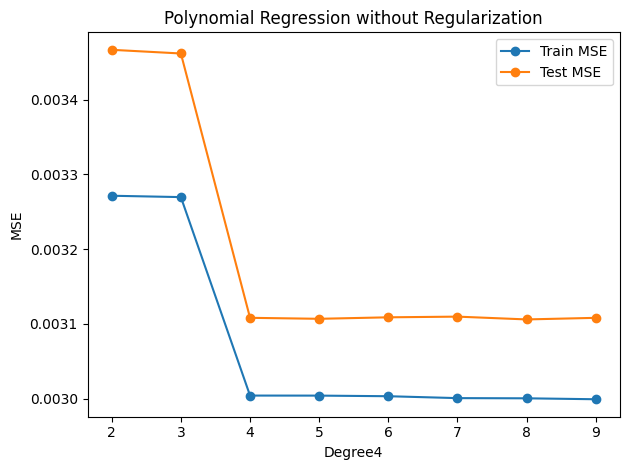

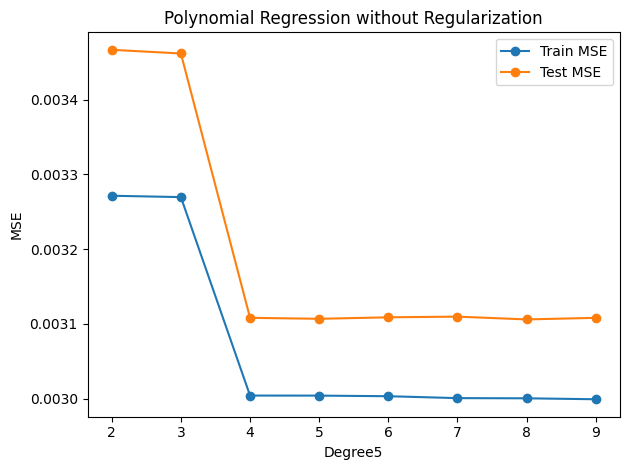

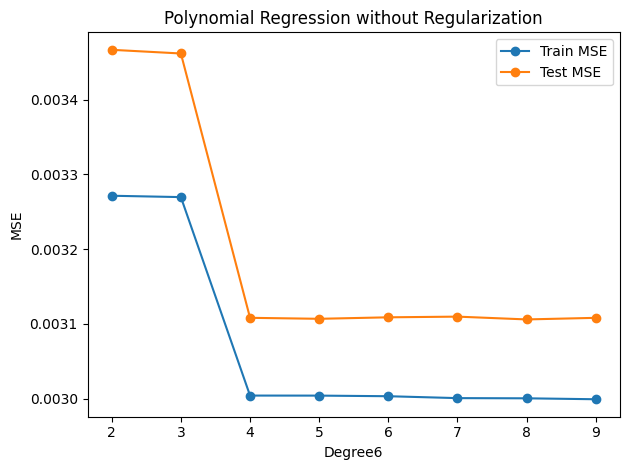

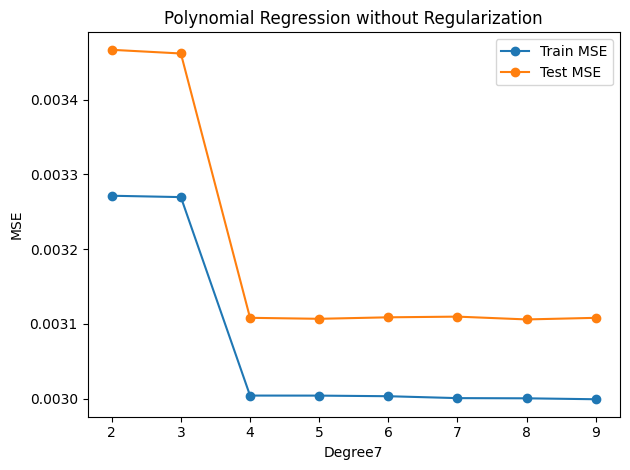

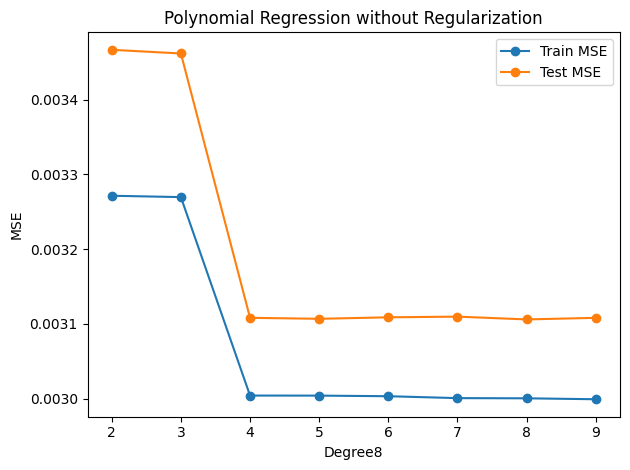

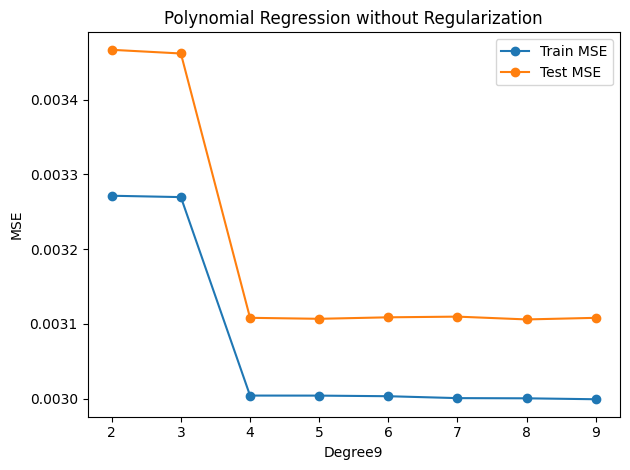

In [ ]:
# Initialize arrays to store MSE values
train_mses = np.zeros(len(degrees))
test_mses = np.zeros(len(degrees))

# Split data into training and test sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Use random_state for reproducibility

# Choose 10 random training samples
random_indices = np.random.choice(X_train.index, size=10, replace=False)
xtrain = X_train.loc[random_indices]
ytrain = y_train.loc[random_indices]'''
# Function to perform polynomial regression without regularization
def polynomial_regression(X, y, degree):
    X_poly = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ordinary Least Squares (no regularization)
    weights = np.linalg.lstsq(X_poly, y, rcond=None)[0]

    return weights

# Function to predict using polynomial regression
def predict(X, weights):
    X_poly = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_poly = np.c_[X_poly, X ** d]  # Add polynomial features up to the specified degree
    return X_poly.dot(weights)

# Iterate over degrees and alphas and calculate MSE for each combination
for i, degree in enumerate(degrees):
    # Perform polynomial regression to get weights
    weights = polynomial_regression(X_train.values, y_train.values, degree)

    # Predict on training and test data
    y_train_pred = predict(X_train.values, weights)
    y_test_pred = predict(X_test.values, weights)

    # Calculate MSE for training and test data
    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Store MSE values
    train_mses[i] = train_mse
    test_mses[i] = test_mse

#plt.figure(figsize=(8, 6))

for i, degree in enumerate(degrees):
    #axs[i].plot(train_mses[i], label='Train MSE', marker='o')
    #axs[i].plot(test_mses[i], label='Test MSE', marker='o')
    #axs[i].set_title(f'Degree {degree}')
    #axs[i].set_ylabel('MSE')
    #axs[i].legend()

    # Plot MSE values
    #plt.figure(figsize=(8, 6))
    plt.plot(degrees, train_mses, label='Train MSE', marker='o')
    plt.plot(degrees, test_mses, label='Test MSE', marker='o')
    #plt.plot(train_mses, marker='o', label=f'Training, Degree={degree}')
    #plt.plot(test_mses, marker='o', label=f'Test, Degree={degree}')

    plt.title('Polynomial Regression without Regularization')
    plt.xlabel(f'Degree{degree}')
    plt.ylabel('MSE')
    #plt.xlabel('Degree')
    plt.legend()
    plt.tight_layout()
    plt.show()

#Model Output vs Target Output

In [ ]:
# Define functions for polynomial regression and Ridge regression with regularization

def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.concatenate((X_poly, X ** d), axis=1)
    return X_poly

def ridge_regression(X, y):
    identity = np.eye(X.shape[1])
    weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return weights

# best_degree and best_alpha are obtained from cross-validation results
best_degree = 8
#best_alpha = 0.1

# Perform polynomial regression with regularization
X_train_poly = polynomial_features(X_train, best_degree)
X_test_poly = polynomial_features(X_test, best_degree)

# Add a column of ones for the bias term
X_train_poly = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
X_test_poly = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

# Compute weights using Ridge regression with the best alpha
weights = ridge_regression(X_train_poly, y_train)

# Predictions on training and test data
y_train_pred = X_train_poly.dot(weights)
y_test_pred = X_test_poly.dot(weights)
# Plot model output vs target output for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Model Output')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Training Data: Model Output vs Target Output')
plt.legend()
plt.show()

# Plot model output vs target output for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Model Output')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Test Data: Model Output vs Target Output')
plt.legend()
plt.show()


LinAlgError: ignored